<a href="https://colab.research.google.com/github/muratkakun/Machine-Learning/blob/master/CSE563_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. Take a picture of yourself, preferably reduce the size to 200x200. Apply the following operations and show each result.

## a)Convert the image to grey value image.Display

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

In [0]:
img = mpimg.imread('D:\\users\\922155\\Desktop\YL DOSYALARI\\CSE563 HW1\\image.jpeg')

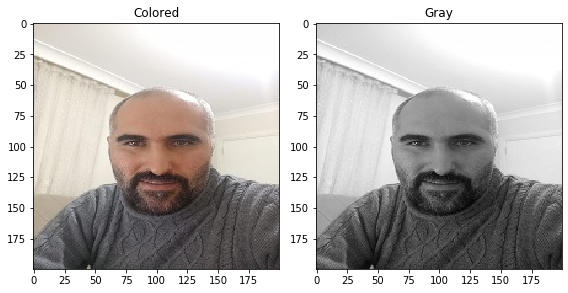

In [0]:

gray = rgb2gray(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Colored")
ax[1].imshow(gray, cmap=plt.cm.gray)
ax[1].set_title("Gray")

fig.tight_layout()
plt.show()


## b) Threshold the image by finding a manual threshold value. Display.

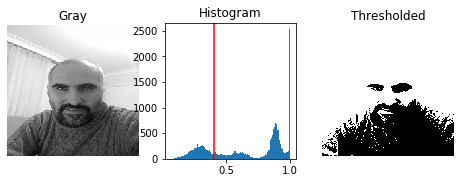

In [0]:

image = gray
thresh = 0.4
binary = (image > thresh).astype('uint8')

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Gray')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## b) Complement the binary threshold. Display

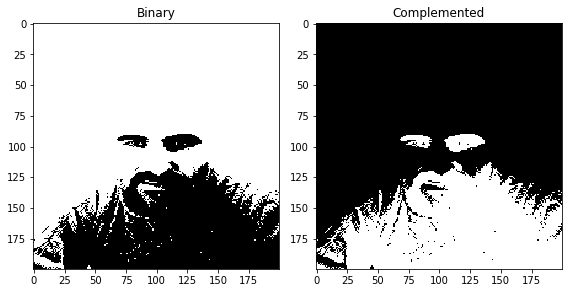

In [0]:
from skimage import util

inverted_img = util.invert(binary)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title("Binary")
ax[1].imshow(inverted_img, cmap=plt.cm.gray)
ax[1].set_title("Complemented")

fig.tight_layout()
plt.show()

## c) Erosion with a square 3x3. Display.

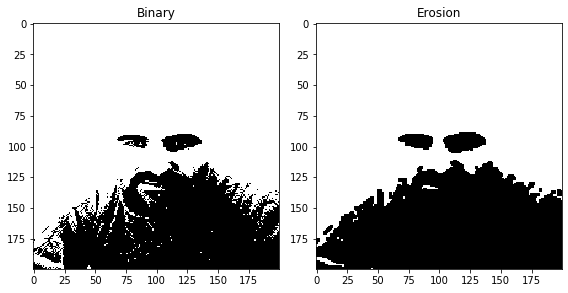

In [0]:
from skimage.morphology import square
from skimage.morphology import rectangle
from skimage.morphology import erosion, dilation, opening, closing, white_tophat

erosion_img = erosion(binary, square(3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title("Binary")
ax[1].imshow(erosion_img, cmap=plt.cm.gray)
ax[1].set_title("Erosion")

fig.tight_layout()
plt.show()

## d) Dilation with a square 3x3. Display.

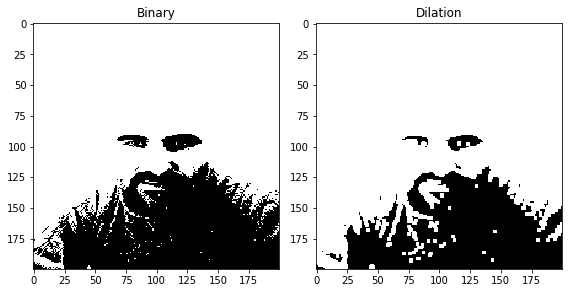

In [0]:
dilation_img = dilation(binary, square(3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title("Binary")
ax[1].imshow(dilation_img, cmap=plt.cm.gray)
ax[1].set_title("Dilation")

fig.tight_layout()
plt.show()

## e) Opening with a disk 7x7. Display.

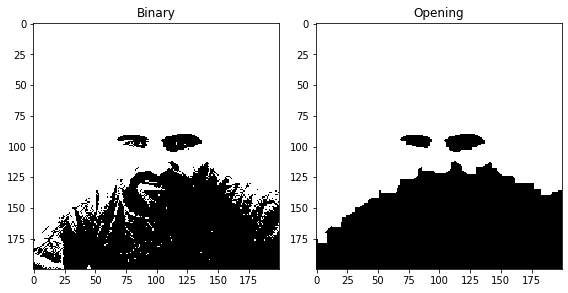

In [0]:
opening_img = opening(binary, square(7))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title("Binary")
ax[1].imshow(opening_img, cmap=plt.cm.gray)
ax[1].set_title("Opening")

fig.tight_layout()
plt.show()

## f) Closing with a disk 7x7. Display

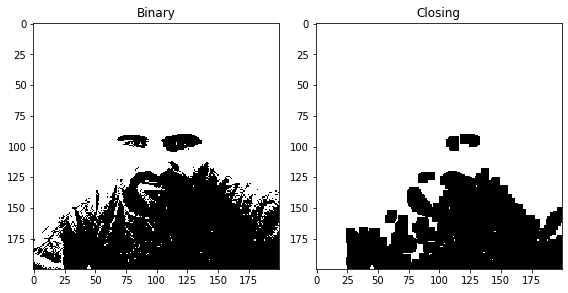

In [0]:
closing_img = closing(binary, square(7))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title("Binary")
ax[1].imshow(closing_img, cmap=plt.cm.gray)
ax[1].set_title("Closing")

fig.tight_layout()
plt.show()

## g) Opening top-hat with a rectangle 3x7. Tophat is: (original)-opened(image)

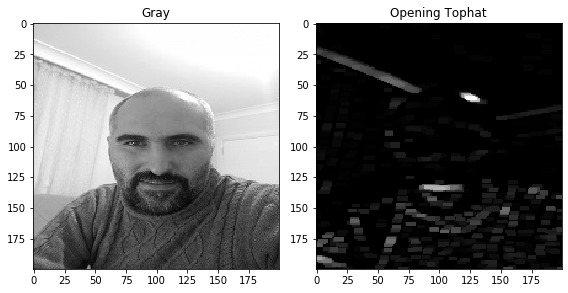

In [0]:
opening_img = opening(gray, square(7))
tophat = gray - opening_img

opening_tophat = opening(tophat, rectangle(3,7))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(gray, cmap=plt.cm.gray)
ax[0].set_title("Gray")
ax[1].imshow(opening_tophat, cmap=plt.cm.gray)
ax[1].set_title("Opening Tophat")

fig.tight_layout()
plt.show()

## h) Closing bottom-hat with a line 9x1: Bottomhat is: closed(image)-image

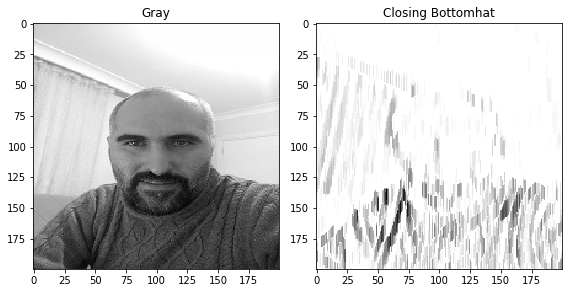

In [0]:
closing_img = opening(gray, square(7))
bottomhat =  closing_img -gray

opening_bottomhat = closing(bottomhat, rectangle(9,1))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(gray, cmap=plt.cm.gray)
ax[0].set_title("Gray")
ax[1].imshow(opening_bottomhat, cmap=plt.cm.gray)
ax[1].set_title("Closing Bottomhat")

fig.tight_layout()
plt.show()

## g) Distance transform of a) or f)

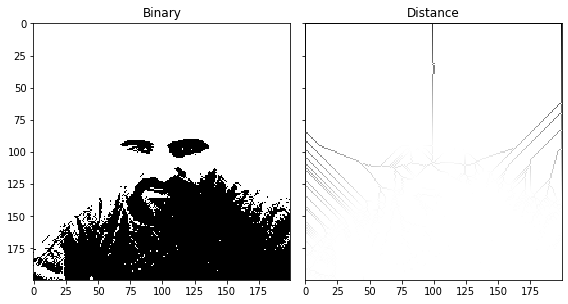

In [0]:
from skimage.morphology import medial_axis, skeletonize

skel, distance = medial_axis(binary, return_distance=True)
dist_on_skel = distance * skel
fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('Binary')

ax[1].imshow(dist_on_skel, cmap='binary')
ax[1].set_title('Distance')

fig.tight_layout()
plt.show()

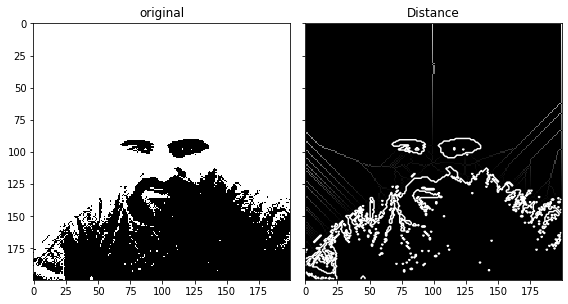

In [0]:


# Generate the data
data = binary

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(data, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(data)
skeleton_lee = skeletonize(data)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray)
ax[0].set_title('original')


ax[1].imshow(dist_on_skel, cmap='gray')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('Distance')


fig.tight_layout()
plt.show()

# Part 2: Implement connected component analysis with union find Algorithm 3.6 in Shapiro book

In [0]:
import numpy as np

def find(label, parents):
    for newlabel in parents:
        if(label == newlabel[0]):
            label = newlabel[1]
            label = find(label, parents)
    
    return label
        
def getNeighbours(r, c, image):
    neighbours = [];
    if(c > 0 and image[r, c - 1] > 0):
         neighbours.append(image[r, c - 1])
    if(r > 0 and c > 0 and image[r -1, c - 1] > 0):
        neighbours.append(image[r - 1, c - 1])
    if(r > 0 and image[r - 1, c] > 0):
        neighbours.append(image[r - 1, c])
    if(r > 0 and c> 0 and c < len(image[0]) - 1 and image[r - 1, c + 1] > 0):
        neighbours.append(image[r - 1, c + 1])
    
    return neighbours;
    

def classical_with_union_find(image):
    numrows = len(image)   
    numcols = len(image[0])
    laballed_image = np.zeros((numrows, numcols)).astype('uint8')
    label = 1
    parent = []
    pair = []
    for i in range(numrows):
      for j in range(numcols):
        if(image[i, j] == 0):
            neighbour = getNeighbours(i, j, laballed_image)
            if(len(neighbour) == 0):
               M = label
               label = label + 1
            else:
                M = np.min(neighbour)
            laballed_image[i,j]=M
            for x in neighbour:
                pair = [x,M]
                add=True
                if(x != M):
                    for y in parent:
                        if(y == pair):
                            add =False
                            break;
                    if(add):
                        parent.append(pair)
    #print(parent)
   

    for i in range(numrows):
        for j in range(numcols):
            if(laballed_image[i,j] > 0):
                laballed_image[i,j] = find(laballed_image[i,j], parent)
        
    return laballed_image

labelled = classical_with_union_find(erosion_img);

print('Unique Label Numbers')
print(np.unique(labelled))
#with np.printoptions(threshold=np.inf):
 #   print(labelled)
 

Unique Label Numbers
[ 0  1  2  8 26 46 50]


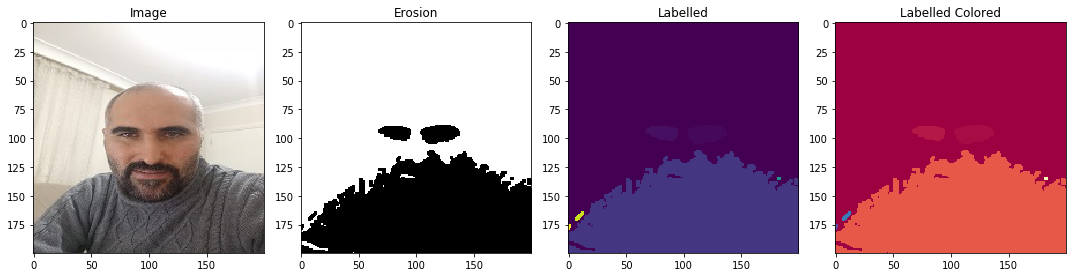

In [0]:

fig, axes = plt.subplots(1, 4, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Image")
ax[1].imshow(erosion_img,cmap='gray')
ax[1].set_title("Erosion")
ax[2].imshow(labelled)
ax[2].set_title("Labelled")
ax[3].imshow(labelled, cmap="Spectral", interpolation='nearest')
ax[3].set_title("Labelled Colored")


fig.tight_layout()
plt.show()
